<a href="https://colab.research.google.com/github/sharmilaar/startupp_profit_prediction/blob/main/startup_profit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install libraries
!pip install numpy pandas matplotlib seaborn scikit-learn


In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [23]:


# Load the CSV file into a DataFrame
df = pd.read_csv('50_Startups_dataset.csv')
print("Data Loaded Successfully!")

# Display the first few rows
df.head()



Data Loaded Successfully!


,Unnamed: 0,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.30,136897.90,471784.20,New York,192261.93
1,1,162597.80,151377.69,443898.63,California,191792.16
2,2,153441.61,101145.65,407934.64,Florida,191050.49
3,3,144372.51,118671.95,383199.72,New York,182902.09
4,4,142107.44,91391.87,366168.52,Florida,166188.04


In [6]:
#missing values
print("Missing Values:\n", df.isnull().sum())


Missing Values:
 Unnamed: 0         0
R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


In [7]:
# Unnecessary Columns
df = df.drop(columns=['Unnamed: 0'], errors='ignore')
print("Updated Columns:", df.columns)


Updated Columns: Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')


In [8]:
#Encode Categorical Data
df = pd.get_dummies(df, columns=['State'], drop_first=True)
df.head()


,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.30,136897.90,471784.20,192261.93,False,True
1,162597.80,151377.69,443898.63,191792.16,False,False
2,153441.61,101145.65,407934.64,191050.49,True,False
3,144372.51,118671.95,383199.72,182902.09,False,True
4,142107.44,91391.87,366168.52,166188.04,True,False


In [9]:
#Define Features and Target
X = df.drop('Profit', axis=1)
y = df['Profit']


In [10]:
#Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
#Train the Models
#1.Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
print("Linear Regression Model Trained")


Linear Regression Model Trained


In [12]:
#2.Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
print("Decision Tree Model Trained")


Decision Tree Model Trained


In [13]:
#Make Predictions
#1.Linear Regression Predictions
linear_preds = linear_model.predict(X_test)


In [14]:
#2.Decision Tree Predictions
tree_preds = tree_model.predict(X_test)


In [15]:
#Evaluate the Models
#1.Linear Regression Evaluation
print("Linear Regression Results:")
print("Mean Absolute Error:", mean_absolute_error(y_test, linear_preds))
print("Mean Squared Error:", mean_squared_error(y_test, linear_preds))
print("R² Score:", r2_score(y_test, linear_preds))


Linear Regression Results:
Mean Absolute Error: 6961.477813252379
Mean Squared Error: 82010363.04430114
R² Score: 0.8987266414328636


In [25]:
#2.Decision Tree Evaluation
print("\nDecision Tree Results:")
print("Mean Absolute Error:", mean_absolute_error(y_test, tree_preds))
print("Mean Squared Error:", mean_squared_error(y_test, tree_preds))
print("R² Score:", r2_score(y_test, tree_preds))



Decision Tree Results:
Mean Absolute Error: 9475.405999999997
Mean Squared Error: 134832408.78649992
R² Score: 0.8334974950162131


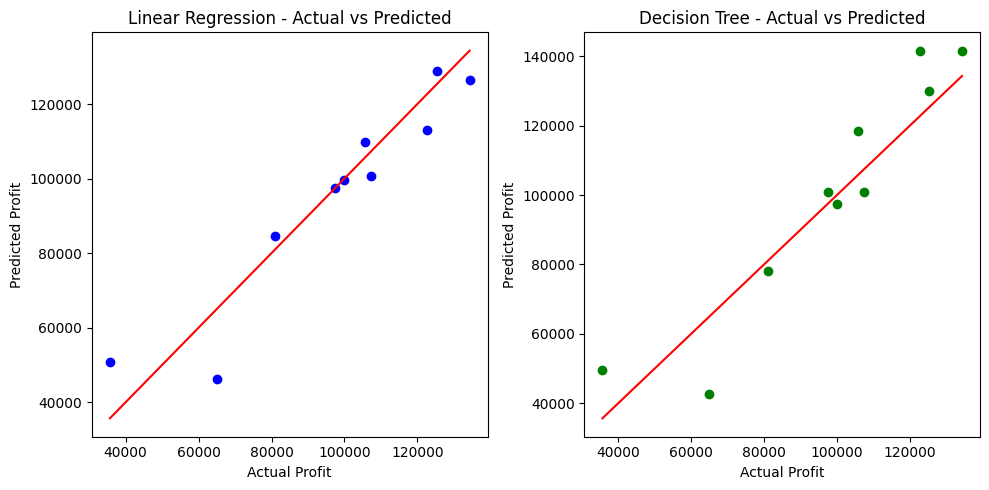

In [17]:
#Visualize Results
plt.figure(figsize=(10,5))

# Linear Regression Plot
plt.subplot(1,2,1)
plt.scatter(y_test, linear_preds, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Linear Regression - Actual vs Predicted')

# Decision Tree Plot
plt.subplot(1,2,2)
plt.scatter(y_test, tree_preds, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Decision Tree - Actual vs Predicted')

plt.tight_layout()
plt.show()


In [26]:
#Prediction profit
new_data = pd.DataFrame([[160000, 140000, 460000, 0, 1]], columns=X.columns)

# Predict using both models
linear_prediction = linear_model.predict(new_data)
tree_prediction = tree_model.predict(new_data)

print("Linear Regression Predicted Profit:", linear_prediction[0])
print("Decision Tree Predicted Profit:", tree_prediction[0])


Linear Regression Predicted Profit: 187039.06110392231
Decision Tree Predicted Profit: 192261.93
